## **Python Lib Import**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import plotly.graph_objs as go
import os
import pandas as pd
py.offline.init_notebook_mode(connected = True)
import datetime as dt
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation

## **Import File & Review Data**

In [19]:
df = pd.read_csv('netflix_titles.csv', encoding='latin1')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.shape


(8809, 26)

In [33]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

## **Handle Missing Value**

In [34]:
missing_values = df.isna().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64


In [35]:
df.drop(columns=df.columns[12:], inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [36]:
df['director'].fillna('No Director', inplace=True)
df['cast'].fillna('No Cast', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('1900-01-01', inplace=True)  # Placeholder date
df['rating'].fillna('Not Rated', inplace=True)
df['duration'].fillna('Unknown Duration', inplace=True)

# Verify the changes
missing_values_after = df.isna().sum()
print("Missing values in each column after handling:\n", missing_values_after)

Missing values in each column after handling:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [37]:
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water      No Director   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans      No Director   
4      s5  TV Show           Kota Factory      No Director   

                                                cast        country  \
0                                            No Cast  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            No Cast        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [38]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [39]:
df['release_year'] = df['release_year'].astype(int)

In [40]:
df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract('([a-zA-Z]+)')
df['duration_value'].fillna(0, inplace=True)

In [41]:
print("Data types of each column:\n", df.dtypes)
print("Missing values in each column after handling:\n", df.isna().sum())

Data types of each column:
 show_id                   object
type                      object
title                     object
director                  object
cast                      object
country                   object
date_added        datetime64[ns]
release_year               int64
rating                    object
duration                  object
listed_in                 object
description               object
duration_value           float64
duration_unit             object
dtype: object
Missing values in each column after handling:
 show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added        98
release_year       0
rating             0
duration           0
listed_in          0
description        0
duration_value     0
duration_unit      0
dtype: int64


In [42]:
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water      No Director   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans      No Director   
4      s5  TV Show           Kota Factory      No Director   

                                                cast        country  \
0                                            No Cast  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            No Cast        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-0

In [43]:
type_counts = df['type'].value_counts()

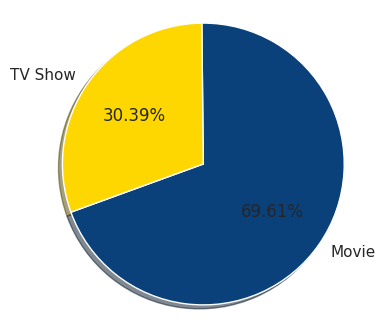

In [46]:
plt.figure(figsize=(4, 4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.2f%%', startangle=200, colors=['#0A417A','#FFD700'], shadow = True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [47]:
release_year_counts = df['release_year'].value_counts().sort_index()

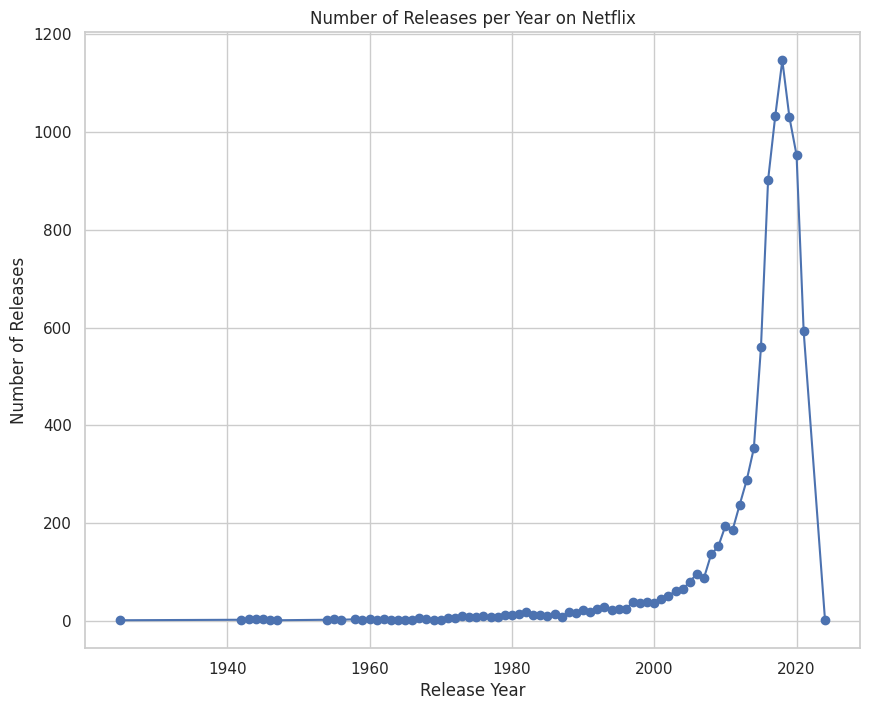

In [48]:
plt.figure(figsize=(10, 8))
plt.plot(release_year_counts.index, release_year_counts.values, marker='o', linestyle='-')
plt.title('Number of Releases per Year on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

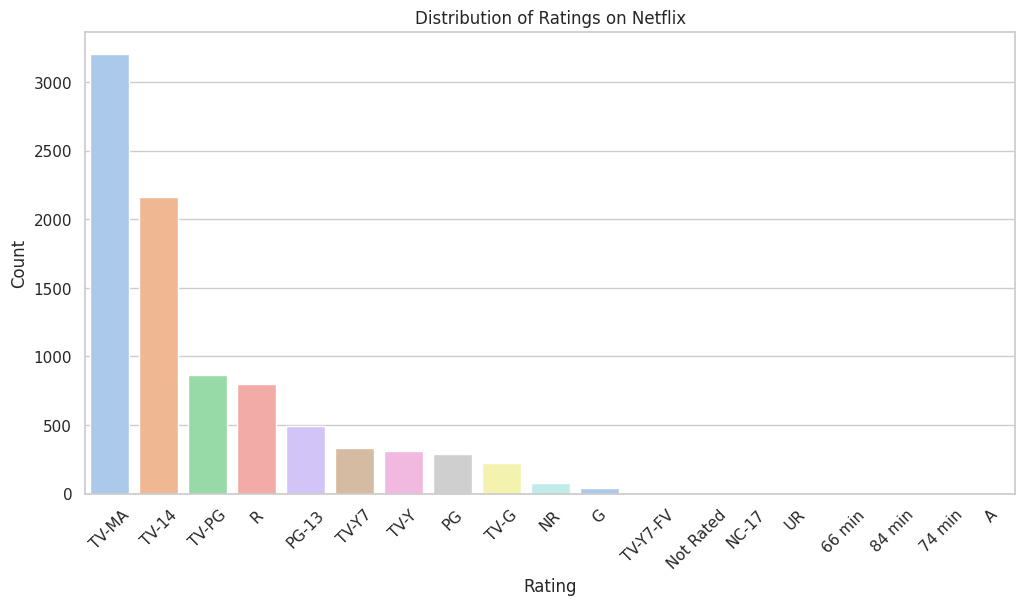

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', palette='pastel', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

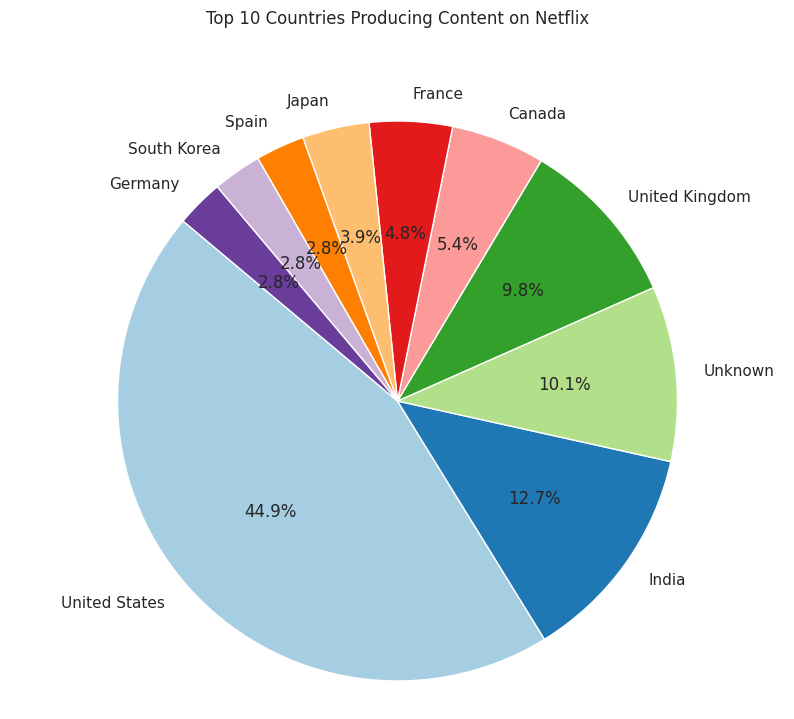

In [50]:
# Split the 'country' column to handle multiple countries listed
df['country'] = df['country'].apply(lambda x: x.split(', '))

# Explode the 'country' column to have one country per row
df = df.explode('country')

# Calculate the top countries producing content
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Countries Producing Content on Netflix',y=1.1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

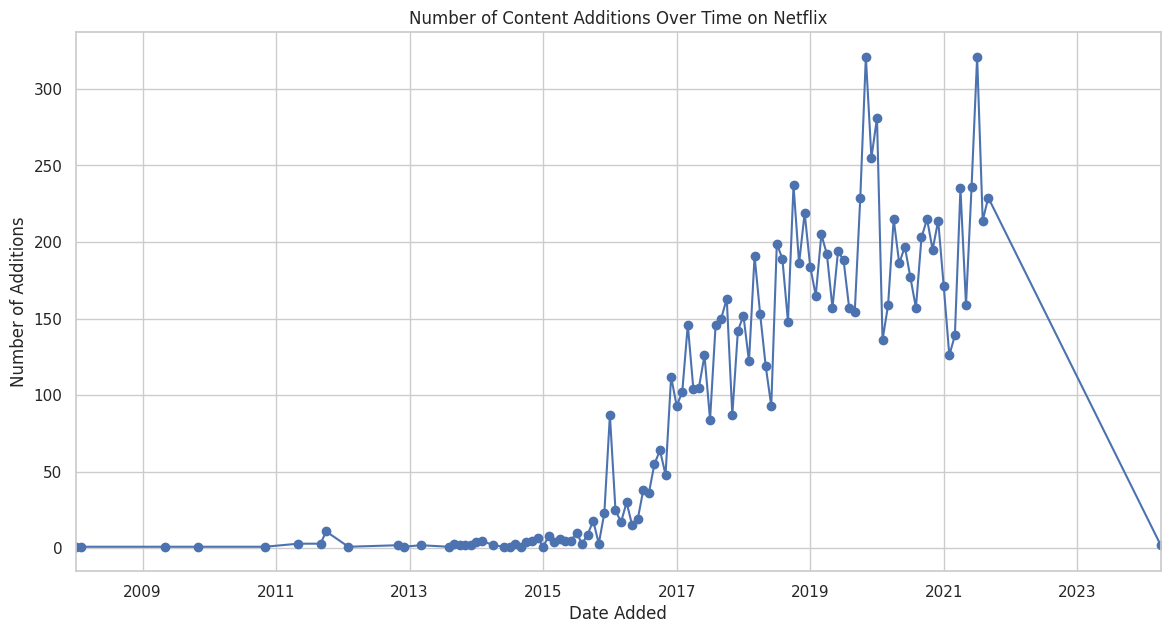

In [51]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.to_period('M')

# Calculate the number of additions per month
content_additions_per_month = df['month_added'].value_counts().sort_index()

# Plot the number of content additions over time
plt.figure(figsize=(14, 7))
content_additions_per_month.plot(kind='line', marker='o', linestyle='-')
plt.title('Number of Content Additions Over Time on Netflix')
plt.xlabel('Date Added')
plt.ylabel('Number of Additions')
plt.grid(True)
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                   title  title_sentiment  \
0   Dick Johnson Is Dead          -0.8225   
1          Blood & Water           0.0000   
2              Ganglands           0.0000   
3  Jailbirds New Orleans           0.0000   
4           Kota Factory           0.0000   

                                         description  description_sentiment  
0  As her father nears the end of his life, filmm...                -0.2960  
1  After crossing paths at a party, a Cape Town t...                -0.1531  
2  To protect his family from a powerful drug lor...                -0.7783  
3  Feuds, flirtations and toilet talk go down amo...                 0.2263  
4  In a city of coaching centers known to train I...                 0.7430  


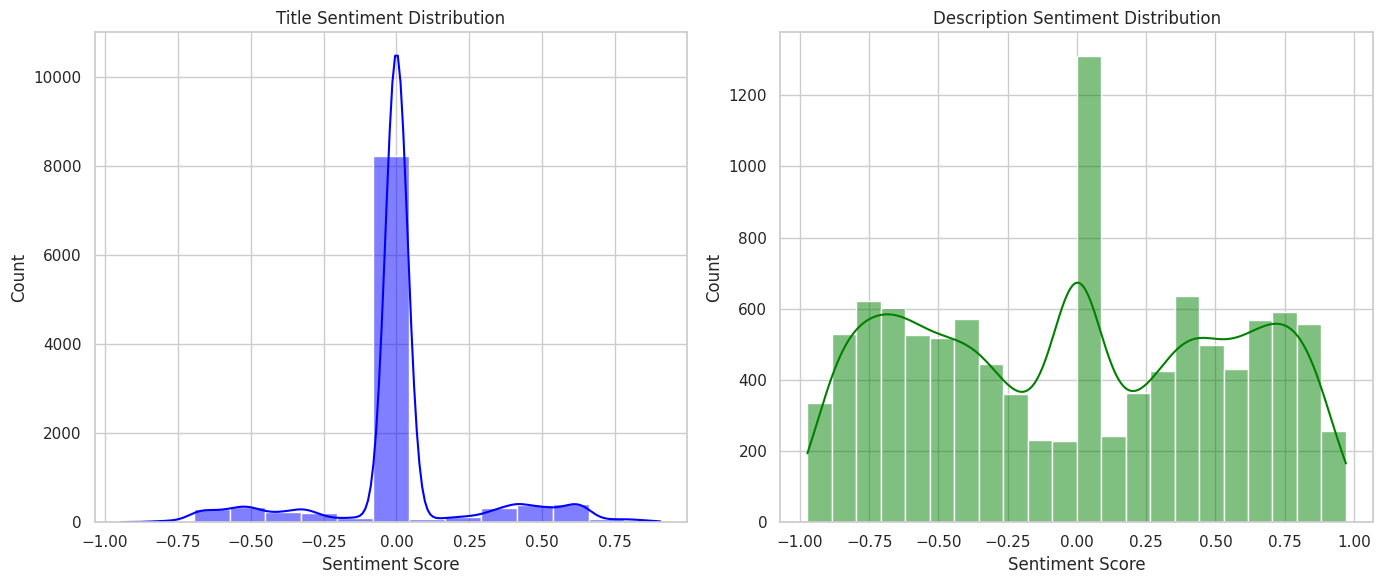

In [55]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    if pd.isna(text):
        return None
    scores = sid.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis on titles and descriptions
df['title_sentiment'] = df['title'].apply(get_sentiment)
df['description_sentiment'] = df['description'].apply(get_sentiment)
# Display the results
print(df[['title', 'title_sentiment', 'description', 'description_sentiment']].head())

# Plotting the sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Title sentiment distribution
plt.subplot(1, 2, 1)
sns.histplot(df['title_sentiment'].dropna(), kde=True, color='blue')
plt.title('Title Sentiment Distribution')
plt.xlabel('Sentiment Score')

# Description sentiment distribution
plt.subplot(1, 2, 2)
sns.histplot(df['description_sentiment'].dropna(), kde=True, color='green')
plt.title('Description Sentiment Distribution')
plt.xlabel('Sentiment Score')

plt.tight_layout()
plt.show()